In [ ]:
import random 
import numpy as np
from skimage import io
from skimage.util import img_as_float

import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
def kmeans(features, k, num_iters=100):
    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    idxs = np.random.choice(N, size=k, replace=False)
    centers = features[idxs]
    assignments = np.zeros(N)
    for n in range(num_iters):
        temp_features = np.repeat(features, k, axis=0)
        temp_centers = np.tile(centers,(N,1))
        results = np.sum(((temp_features-temp_centers)**2),axis=1).reshape(N,k)
        clusters = np.argmin(results, axis=1)
        for i in range(k):
          idx = np.where(clusters == i)[0]
          centers[i] = np.sum(features[idx],axis=0)/len(features[idx])
    assignments = clusters

    return assignments

def color_features(img):
    H, W, C = img.shape
    img = img_as_float(img)
    features = np.zeros((H*W, C))

    features = img.reshape(H*W, C)

    return features

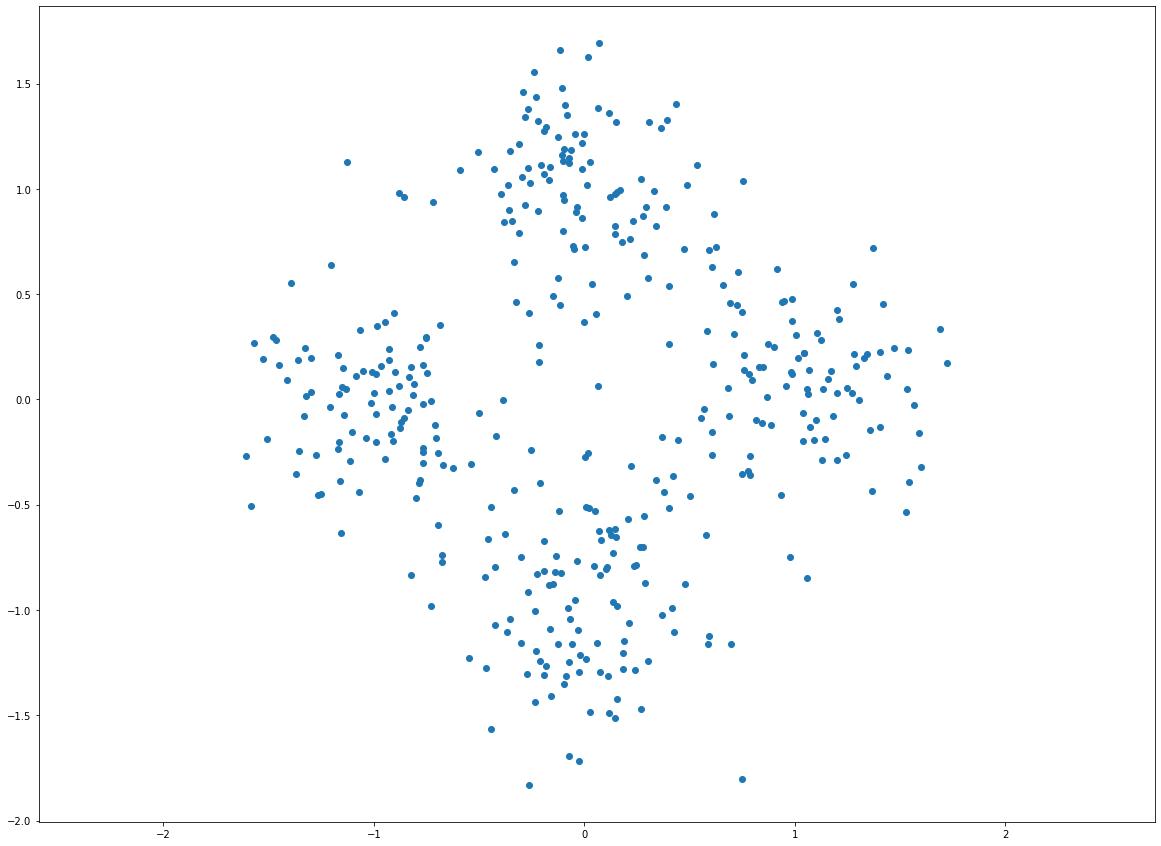

In [ ]:
mean1 = [-1, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [0, 1]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = [1, 0]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, 100)

mean4 = [0, -1]
cov4 = [[0.1, 0], [0, 0.1]]
X4 = np.random.multivariate_normal(mean4, cov4, 100)

X = np.concatenate((X1, X2, X3, X4))

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

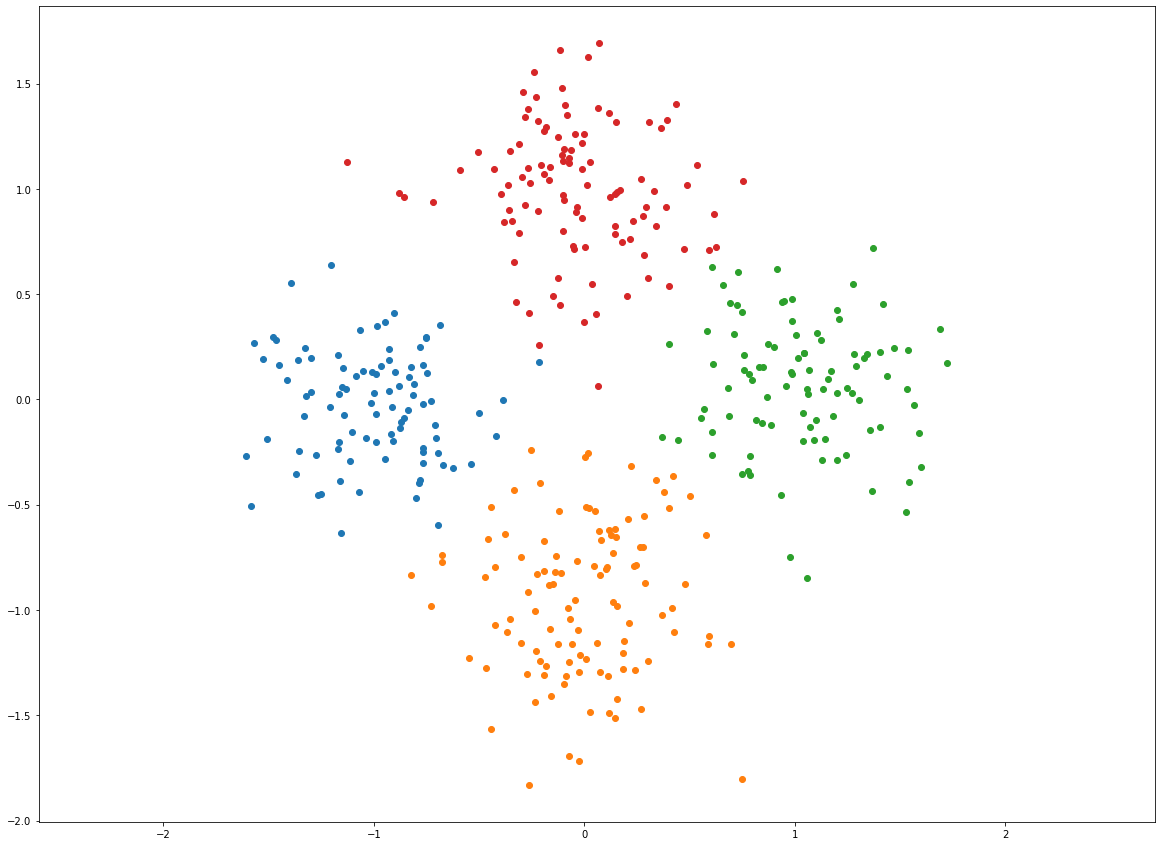

In [ ]:
np.random.seed(0)
assignments = kmeans(X, 4)

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

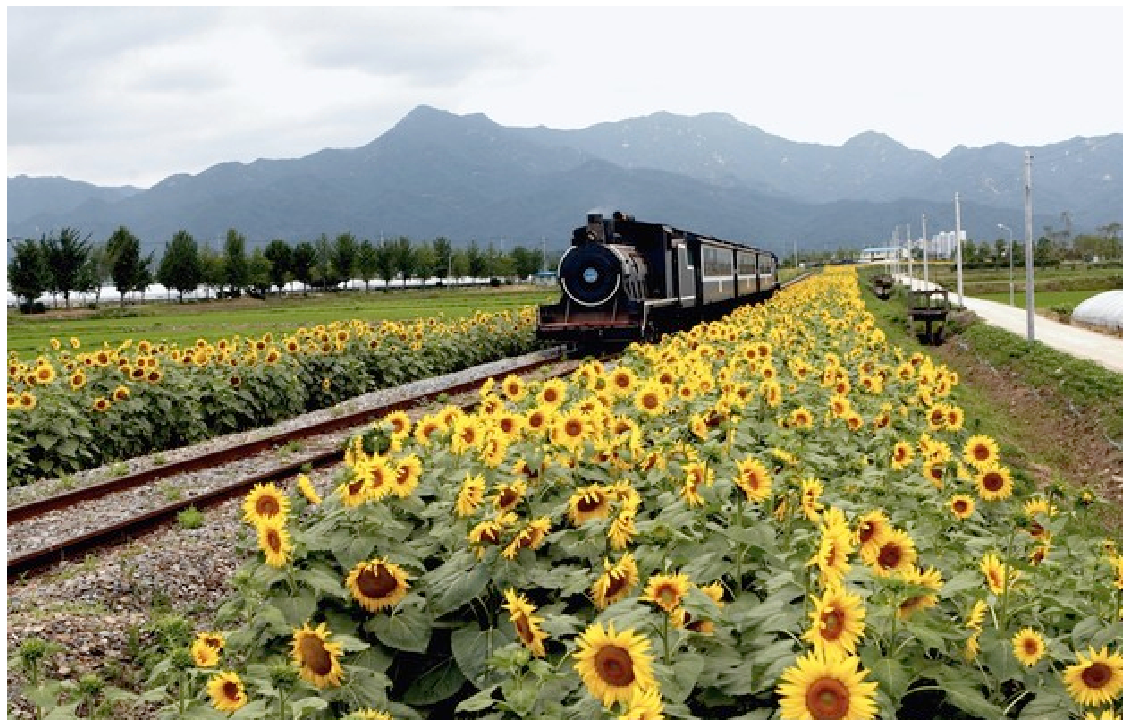

In [ ]:
# Load and display image
img = io.imread('train.jpg')
H, W, C = img.shape

plt.imshow(img)
plt.axis('off')
plt.show()

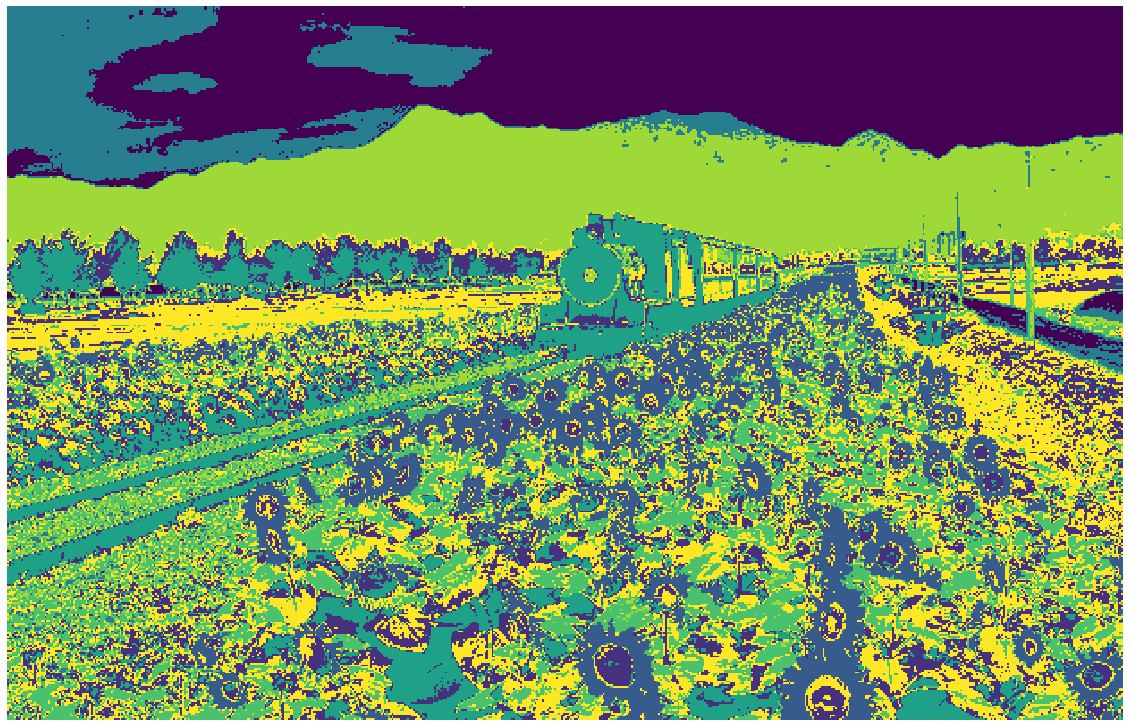

In [ ]:
np.random.seed(0)

features = color_features(img)

assert features.shape == (H * W, C),\
    "Incorrect shape! Check your implementation."

assert features.dtype == np.float,\
    "dtype of color_features should be float."

assignments = kmeans(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()